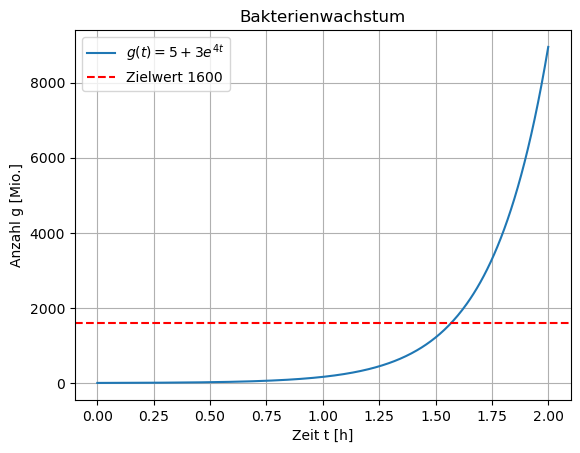

NameError: name 'Markdown' is not defined

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def find_time(func, target, start_value, tol=1e-4, max_iter=100):
    # Ableitung der Funktion
    df_dt = sp.diff(func, t)

    # Umwandlung in numerische Funktionen
    func = sp.lambdify(t, func, 'numpy')
    df_dt_func = sp.lambdify(t, df_dt, 'numpy')

    # Newton-Verfahren implementieren
    def newton_method(func, d_func, x0, tol=1e-4, max_iter=100):
        x = x0
        for i in range(max_iter):
            fx = func(x) - target
            dfx = d_func(x)
            if dfx == 0:
                raise ValueError("Ableitung ist Null, Newton-Verfahren kann nicht fortgesetzt werden.")
            x_new = x - fx / dfx
            if abs(x_new - x) < tol:
                return x_new
            x = x_new
        raise ValueError("Newton-Verfahren konvergiert nicht innerhalb der maximalen Iterationen.")

    # Anwenden des Newton-Verfahrens
    result = newton_method(func, df_dt_func, start_value)
    return result

# Definition der Variablen und Funktion
t = sp.symbols('t')
g = 5 + 3 * sp.exp(4*t)

# Zielwert
target = 1600

# Geeigneter Startwert aus dem Plot (ca. 2 Stunden)
start_value = 2.0

result = find_time(g, target, start_value)
display(Markdown(f"**Gefundener Zeitpunkt \( t \), bei dem die Population 1600 Mio. Bakterien erreicht:**"))
display(Markdown(f"\\[ t = {result} \\]"))